# Data Analysis

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('breast-cancer-wisconsin.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [2]:
# List of attribute names
attribute_names = [
   "Sample code number",
   "Clump Thickness",
   "Uniformity of Cell Size",
   "Uniformity of Cell Shape",
   "Marginal Adhesion",
   "Single Epithelial Cell Size",
   "Bare Nuclei",
   "Bland Chromatin",
   "Normal Nucleoli",
   "Mitoses",
   "Class"
]

df.columns = attribute_names
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
# All columns 
print(list(df.columns))

# Shape of data
print(f'The dataset has shape {df.shape}')

['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
The dataset has shape (699, 11)


In [4]:
# Replace ? with NaN
df.replace('?', np.nan, inplace=True)

In [5]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  683 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [6]:
#check the missing values
df.isnull().sum()

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [7]:
# Count rows with null values
null_rows_count = df.isnull().any(axis=1).sum()

print("Number of rows with null values (including ? as null):", null_rows_count)

Number of rows with null values (including ? as null): 16


In [8]:
duplicate_rows_count = df.duplicated().sum()

print("Number of rows with duplicate values:", duplicate_rows_count)

Number of rows with duplicate values: 8


In [9]:
#Frequency of class
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

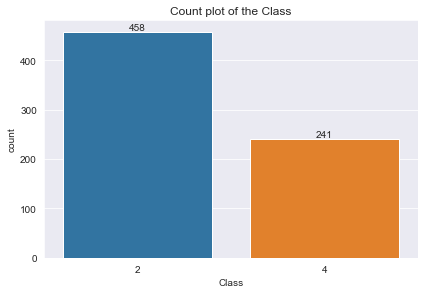

In [10]:
#Frequency of Class in barchart
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

fig = plt.figure()
ax = sns.countplot(x='Class', data=df)
for container in ax.containers:
  ax.bar_label(container)
plt.tight_layout()
plt.title('Count plot of the Class')
plt.show(fig)

# Data Preprocessing

In [11]:
newData=df.dropna(how='any')

newData.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [12]:
#processingData=newData.drop_duplicates()
processingData = newData

In [13]:
#as type is a categorical need to transform the categorical features into numerical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
processingData['Class'] = labelencoder.fit_transform(processingData['Class'])
print(processingData['Class'])

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: Class, Length: 683, dtype: int64


C:\Users\Nethmini\AppData\Local\Temp/ipykernel_6616/4144476296.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processingData['Class'] = labelencoder.fit_transform(processingData['Class'])


In [14]:
# Remove the "Sample code number" column
cleanedData = processingData.drop("Sample code number", axis=1)

In [15]:
cleanedData

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


In [16]:
#Frequency of sample code number
cleanedData['Class'].value_counts()

0    444
1    239
Name: Class, dtype: int64

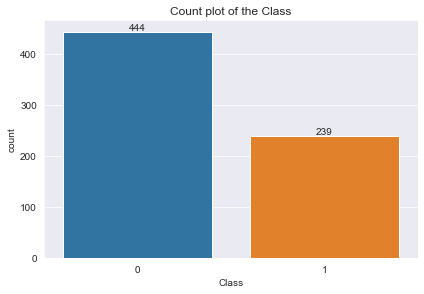

In [17]:
sns.set_style('darkgrid')

fig = plt.figure()
ax = sns.countplot(x='Class', data=cleanedData)
for container in ax.containers:
  ax.bar_label(container)
plt.tight_layout()
plt.title('Count plot of the Class')
plt.show(fig)

In [18]:
# Assuming the first 9 columns are the input features and the last column is the target variable
X = cleanedData.iloc[:, :-1]  # Features (first 9 columns)
y = cleanedData.iloc[:, -1]   # Target variable (last column)

In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: Class, Length: 683, dtype: int64

In [20]:
X

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [21]:
print("shape of the x : ",X.shape)
print("shape of the y : ",y.shape)

shape of the x :  (683, 9)
shape of the y :  (683,)


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import time

# Create a DataFrame to store the results
results_df = pd.DataFrame(index=["K-NN", "Naive Bayes", "Logistic Regression", "SVM",
                                  "Decision Tree", "Random Forest", "GradientBoosting"],
                          columns=["Accuracy", "Precision", "Recall", "F1 Score", "Time"])

std_dev_df = pd.DataFrame(index=["K-NN", "Naive Bayes", "Logistic Regression", "SVM",
                                  "Decision Tree", "Random Forest", "GradientBoosting"],
                          columns=["Accuracy", "Precision", "Recall", "F1 Score"])

# Initialize classifiers
classifiers = [
    ("K-NN", KNeighborsClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("Logistic Regression", LogisticRegression()),
    ("SVM", SVC()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("GradientBoosting", GradientBoostingClassifier())
]

# Perform cross-validation and collect metrics
for model_name, model in classifiers:
    start_time = time.time()
    
    # Accuracy
    accuracy_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    accuracy = np.mean(accuracy_scores)
    
    # Precision
    precision_scores = cross_val_score(model, X, y, cv=5, scoring='precision')
    precision = np.mean(precision_scores)
    
    # Recall
    recall_scores = cross_val_score(model, X, y, cv=5, scoring='recall')
    recall = np.mean(recall_scores)
    
    # F1 Score
    f1_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
    f1 = np.mean(f1_scores)
    
    # Standard Deviation
    std_dev_accuracy = np.std(accuracy_scores)
    std_dev_precision = np.std(precision_scores)
    std_dev_recall = np.std(recall_scores)
    std_dev_f1 = np.std(f1_scores)
    
    end_time = time.time()
    
    # Execution time
    execution_time = end_time - start_time
    
    # Insert results into the DataFrame
    results_df.loc[model_name] = [accuracy, precision, recall, f1, execution_time]
    
    # Insert standard deviations into the std_dev DataFrame
    std_dev_df.loc[model_name] = [std_dev_accuracy, std_dev_precision, std_dev_recall, std_dev_f1]

# Display the results DataFrame
print("Results:")
print(results_df)

print("\nStandard Deviations:")
print(std_dev_df)


Results:
                     Accuracy Precision    Recall  F1 Score      Time
K-NN                 0.969311  0.960056  0.954078  0.955871  0.412911
Naive Bayes          0.959049  0.919158  0.970656  0.943665  0.199464
Logistic Regression   0.96637  0.959318  0.945656  0.951735   0.67065
SVM                  0.963461  0.943218  0.954078   0.94748  0.364651
Decision Tree        0.935627  0.923003  0.908067  0.916084  0.183281
Random Forest        0.969311  0.951889  0.949823  0.951822  5.175953
GradientBoosting      0.95906  0.951477  0.933067  0.941045  2.559898

Standard Deviations:
                     Accuracy Precision    Recall  F1 Score
K-NN                 0.023241  0.041477  0.051664  0.034155
Naive Bayes          0.017577   0.04212  0.010427  0.022804
Logistic Regression    0.0204  0.040028  0.036265  0.029125
SVM                  0.025667  0.034379  0.060917  0.038545
Decision Tree        0.018007   0.03802  0.051895  0.024985
Random Forest        0.020304  0.038575  0.059779

# Best Parameter

## KNN

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # List of different values for the number of neighbors
    'weights': ['uniform', 'distance'],  # Weights to use ('uniform' or 'distance')
    'p': [1, 2]  # Power parameter for Minkowski distance (1 for Manhattan, 2 for Euclidean)
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the model to your data
grid_search.fit(X, y)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Best Score: 0.969310863031344


In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Create a Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()
mnb_classifier = MultinomialNB()

# Perform 5-fold cross-validation and calculate accuracy
accuracy_scores_gnb = cross_val_score(gnb_classifier, X, y, cv=5, scoring='accuracy')
accuracy_scores_mnb = cross_val_score(mnb_classifier, X, y, cv=5, scoring='accuracy')

# Calculate the mean accuracy across all folds
mean_accuracy_gnb = np.mean(accuracy_scores_gnb)
print("Mean Accuracy (GaussianNB):", mean_accuracy_gnb)

mean_accuracy_mnb = np.mean(accuracy_scores_mnb)
print("Mean Accuracy (MultinomialNB):", mean_accuracy_mnb)

Mean Accuracy (GaussianNB): 0.9590489480463719
Mean Accuracy (MultinomialNB): 0.8873765564620009


In [26]:
from sklearn.linear_model import LogisticRegression

# Define the parameter grid to search
param_grid = {
    'penalty': ['l1', 'l2'],            # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10],    # Regularization strength
    'solver': ['liblinear', 'saga']    # Solver for optimization
}

# Create Logistic Regression classifier
logistic_reg = LogisticRegression()

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the model to your data
grid_search.fit(X, y)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.9663696865607557


## SVM

In [27]:
# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient for 'rbf' kernel
}

# Create an SVM classifier
svm_classifier = SVC()

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the model to your training data
grid_search.fit(X, y)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.9678402747960497


## DecisionTree

In [28]:
# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Splitting criterion
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
}

# Create a Decision Tree classifier
dtree = DecisionTreeClassifier()

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the model to your data
grid_search.fit(X, y)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 0.9531880635465866


C:\Users\Nethmini\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.93560541 0.93416702 0.94586733 0.94587806 0.94587806 0.94732718
 0.9414985  0.94879777 0.95171748 0.93855732 0.93563761 0.94732718
 0.94295835 0.94588879 0.94879777 0.95026836 0.9414985  0.95171748
 0.93562688 0.93563761 0.94732718 0.93564835 0.94879777 0.94732718
 0.94879777 0.9414985  0.95318806 0.93416702 0.93855732 0.94732718
 0.94442894 0.94586733 0.94879777 0.94879777 0.9414985  0.95171748
 0.93417776 0.93709747 0.94586733 0.94003864 0.94295835 0.94879777
 0.94879777 0.9414985  0.95318806 0.94001717 0.94001717 0.94586733
 0.93564835 0.94586733 0.94732718 0.9414985  0.94296909 0.95171748
 0.93413482 0.93121511 0.93413482 0.92973379 0.92683555 0.93413482
 0.93998497 0.9326857  0.93705453 0.93559468 0.92975526 0.93413482
 0.92681408 0.92389438 0.92975526 0.93997424 0.93998497 0.93412409
 0.93267497 0.93413482 0.93413482 0.92975526 0.926

## RandomForest

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the model to your data
grid_search.fit(X, y)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.9722198368398456


## GradientBoosting

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the ensemble
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 4, 5],  # Maximum depth of each tree
    'min_samples_split': [2, 3, 4]  # Minimum number of samples required to split an internal node
}

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the model to your data
grid_search.fit(X, y)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 150}
Best Score: 0.9619901245169601


# Best Model

In [31]:
# Create a DataFrame to store the results
best_results_df = pd.DataFrame(index=["K-NN", "Naive Bayes", "Logistic Regression", "SVM",
                                  "Decision Tree", "Random Forest", "GradientBoosting"],
                          columns=["Accuracy", "Precision", "Recall", "F1 Score", "Time"])

best_std_dev_df = pd.DataFrame(index=["K-NN", "Naive Bayes", "Logistic Regression", "SVM",
                                  "Decision Tree", "Random Forest", "GradientBoosting"],
                          columns=["Accuracy", "Precision", "Recall", "F1 Score"])

# Initialize classifiers
classifiers = [
    ("K-NN", KNeighborsClassifier(n_neighbors=7, p=2, weights='uniform')),
    ("Naive Bayes", GaussianNB()),
    ("Logistic Regression", LogisticRegression(C = 10, penalty = 'l1', solver = 'liblinear')),
    ("SVM", SVC(C=0.1, gamma='scale',kernel='rbf')),
    ("Decision Tree", DecisionTreeClassifier(random_state=15, criterion='gini', max_depth=None, min_samples_leaf= 4, min_samples_split=10)),
    ("Random Forest", RandomForestClassifier(bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100)),
    ("GradientBoosting", GradientBoostingClassifier(learning_rate=0.2, max_depth=3, min_samples_split=4, n_estimators=50))
]

# Perform cross-validation and collect metrics
for model_name, model in classifiers:
    start_time = time.time()
    
    # Accuracy
    accuracy_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    accuracy = np.mean(accuracy_scores)
    
    # Precision
    precision_scores = cross_val_score(model, X, y, cv=5, scoring='precision')
    precision = np.mean(precision_scores)
    
    # Recall
    recall_scores = cross_val_score(model, X, y, cv=5, scoring='recall')
    recall = np.mean(recall_scores)
    
    # F1 Score
    f1_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
    f1 = np.mean(f1_scores)
    
    # Standard Deviation
    std_dev_accuracy = np.std(accuracy_scores)
    std_dev_precision = np.std(precision_scores)
    std_dev_recall = np.std(recall_scores)
    std_dev_f1 = np.std(f1_scores)
    
    end_time = time.time()
    
    # Execution time
    execution_time = end_time - start_time
    
    # Insert results into the DataFrame
    best_results_df.loc[model_name] = [accuracy, precision, recall, f1, execution_time]
    
    # Insert standard deviations into the std_dev DataFrame
    best_std_dev_df.loc[model_name] = [std_dev_accuracy, std_dev_precision, std_dev_recall, std_dev_f1]

# Display the results DataFrame
print("Best Results:")
print(best_results_df)

print("\nBest Standard Deviations:")
print(best_std_dev_df)

Best Results:
                     Accuracy Precision    Recall  F1 Score      Time
K-NN                 0.966402  0.955835  0.949911  0.951497  0.345099
Naive Bayes          0.959049  0.919158  0.970656  0.943665  0.171842
Logistic Regression   0.96637  0.959318  0.945656  0.951735  0.203113
SVM                   0.96784  0.944107  0.966578  0.954864  0.347583
Decision Tree        0.951717  0.927205  0.937323  0.931733  0.153057
Random Forest         0.96638  0.952336  0.945656  0.949216  4.420627
GradientBoosting      0.96199  0.955559  0.937323  0.947414  1.343661

Best Standard Deviations:
                     Accuracy Precision    Recall  F1 Score
K-NN                 0.025515  0.042263  0.058289  0.038155
Naive Bayes          0.017577   0.04212  0.010427  0.022804
Logistic Regression    0.0204  0.040028  0.036265  0.029125
SVM                  0.018769  0.036586  0.024956  0.026096
Decision Tree        0.016988  0.036019  0.026214  0.023412
Random Forest        0.020914  0.038515

In [32]:
plot_df = best_results_df.drop('Time', axis=1)  # Remove the 'Time' column

In [33]:
print(plot_df)

                     Accuracy Precision    Recall  F1 Score
K-NN                 0.966402  0.955835  0.949911  0.951497
Naive Bayes          0.959049  0.919158  0.970656  0.943665
Logistic Regression   0.96637  0.959318  0.945656  0.951735
SVM                   0.96784  0.944107  0.966578  0.954864
Decision Tree        0.951717  0.927205  0.937323  0.931733
Random Forest         0.96638  0.952336  0.945656  0.949216
GradientBoosting      0.96199  0.955559  0.937323  0.947414


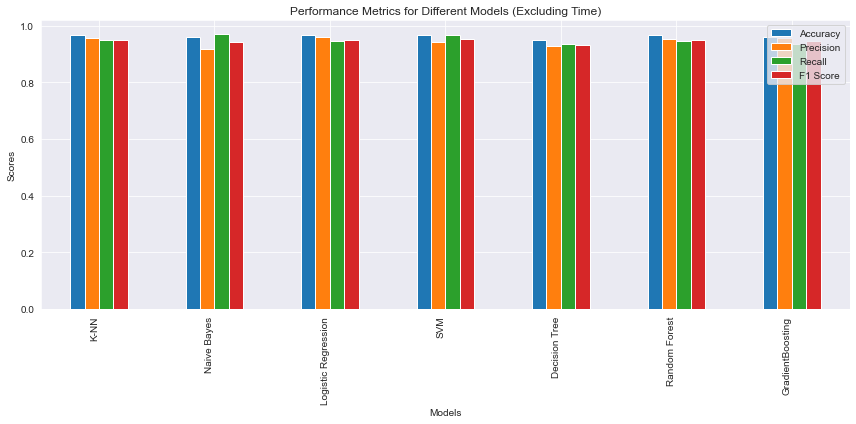

In [34]:
import matplotlib.pyplot as plt

plot_df.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Metrics for Different Models (Excluding Time)')
plt.xticks(rotation=90, ha="right")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

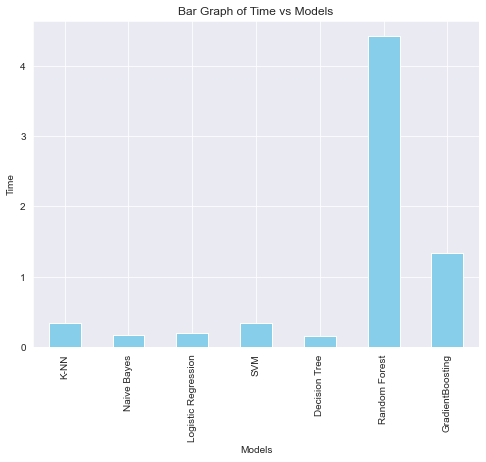

In [35]:
y_axis = 'Time'
plt.figure(figsize=(8, 6))
best_results_df[y_axis].plot(kind='bar', color='skyblue')
plt.xlabel('Models')
plt.ylabel(y_axis)
plt.title(f'Bar Graph of {y_axis} vs Models')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

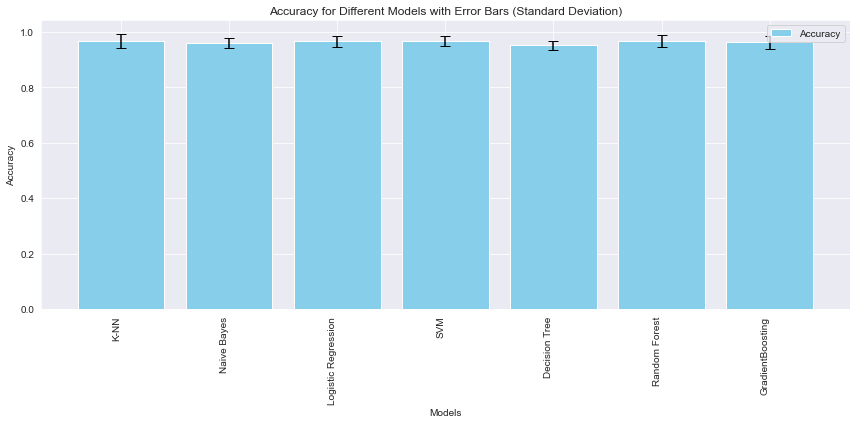

In [36]:
models = ["K-NN", "Naive Bayes", "Logistic Regression", "SVM", "Decision Tree", "Random Forest", "GradientBoosting"]

# Select accuracy values and standard deviations
accuracy_values = best_results_df["Accuracy"]
std_dev_values = best_std_dev_df["Accuracy"]

# Plot accuracy with error bars
plt.figure(figsize=(12, 6))
plt.bar(models, accuracy_values, yerr=std_dev_values, capsize=5, color='skyblue', label='Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Models with Error Bars (Standard Deviation)')
plt.xticks(rotation=90, ha="right")
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()